In [22]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import pylab
import statsmodels.api as sm
import seaborn as sns

In [23]:
df =  pd.read_csv("hmelq.csv")

In [24]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [25]:
df.dtypes

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object

In [84]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [85]:
df.dtypes

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object

In [26]:
df["bad"] = df["bad"].astype("object") #convert bad column from int to object

In [ ]:
"""data normalization """

Xnew = Xold/Xmax #simple feature scalling (0-1 arasinda)

Xnew = (Xold - Xmin)/(Xmax - Xmin) #Min-Max Method 

Xnew = Xold - mean / standartSapma #Z-score (genellikle -3 ile +3 arasinda ama alt ust degerler de alabilir )df["bad"].std = standat sapma

In [27]:
"""binning data in python"""

bins  = np.linspace(min(df["value"]) , max(df["value"]),4)

In [28]:
group_names=["Low" , "Medium" , "High"]

In [29]:
df["value binned"] = pd.cut(df["value"],bins,labels=group_names,include_lowest=True)

In [30]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc,value binned
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042,Low
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479,Low
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354,Low
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992,Low
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327,Low


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A398896B38>]],
      dtype=object)

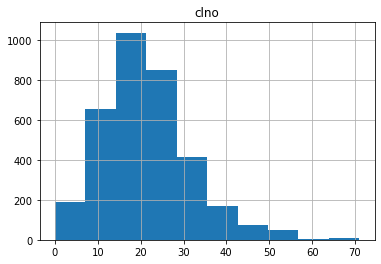

In [31]:
df.hist("clno")

In [32]:
col=df['clno']



In [33]:


stat, p = stats.shapiro(col)
print("Statistics:%3.3f, p=%.3f " % (stat,p))

# H0: Normal dagilimdan gelmektedir
# H1: Normal dagilimdan gelmemektedir. 
# burada p values 0.785 oldugu icin 0.05'ten buyuk olmaktadir. Bu nedenle, yeterli kanit olmadigindan red edilir. 

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0")

Statistics:nan, p=1.000 
Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A39B0E1B38>]],
      dtype=object)

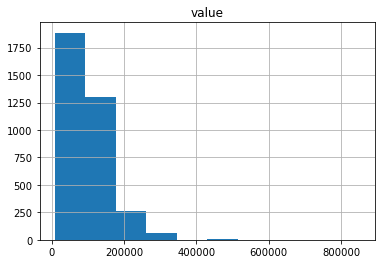

In [34]:
df.hist("value")

In [35]:
val=df['value']

In [36]:
stat, p = stats.shapiro(val)
print("Statistics:%3.3f, p=%.3f " % (stat,p))

# H0: Normal dagilimdan gelmektedir
# H1: Normal dagilimdan gelmemektedir. 
# burada p values 0.785 oldugu icin 0.05'ten buyuk olmaktadir. Bu nedenle, yeterli kanit olmadigindan red edilir. 

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0")

Statistics:nan, p=1.000 
Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A39B381860>]],
      dtype=object)

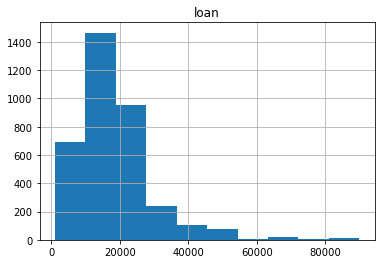

In [38]:
df.hist("loan")

In [39]:
lo = df["loan"]

In [40]:
stat, p = stats.shapiro(lo)
print("Statistics:%3.3f, p=%.3f " % (stat,p))

# H0: Normal dagilimdan gelmektedir
# H1: Normal dagilimdan gelmemektedir. 
# burada p values 0.785 oldugu icin 0.05'ten buyuk olmaktadir. Bu nedenle, yeterli kanit olmadigindan red edilir. 

alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0")

Statistics:0.849, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0


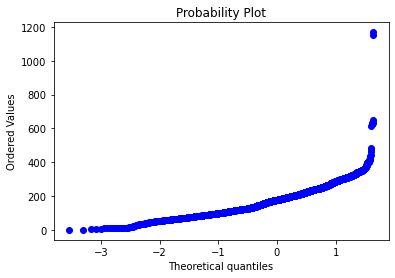

In [54]:
stats.probplot(df['clage'], dist="norm", plot = pylab) # normal probability plot 
pylab.show()

In [41]:
"""Turning categorical variables into quantitative variables in Python
"""
pd.get_dummies(df["reason"]).head()

,DebtCon,HomeImp
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
reaso_counts = df["reason"].value_counts()

In [43]:
reaso_counts

DebtCon    2371
HomeImp    1058
Name: reason, dtype: int64

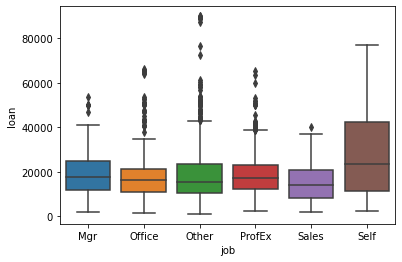

In [44]:
sns.boxplot(x="job" , y = "loan" , data=df)

Text(0, 0.5, 'value of cridet')

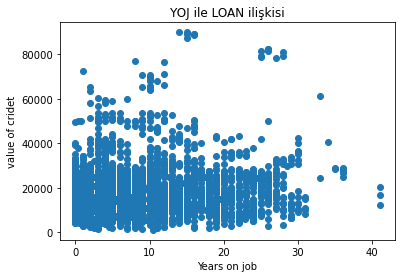

In [46]:
x , y = df["yoj"] , df["loan"]
plt.scatter(x,y)

plt.title("YOJ ile LOAN ilişkisi")
plt.xlabel("Years on job")
plt.ylabel("value of cridet")

(0.0, 94310.0)

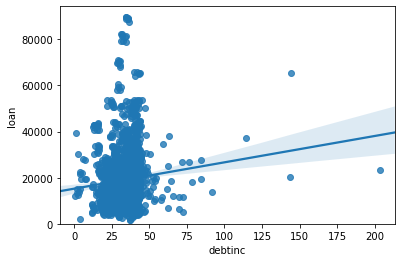

In [47]:
sns.regplot(x = "debtinc" , y = "loan" ,data=df) #yajeb an yakoon al alaka linear hatta nastafeed min haza al graph.
plt.ylim(0,)

(0.0, 892060.0)

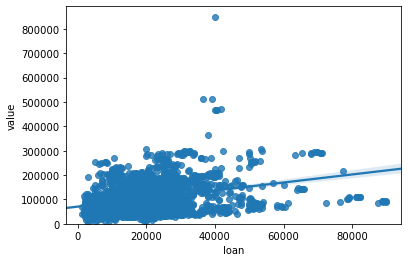

In [107]:
sns.regplot(x = "loan" , y = "value" ,data=df) #yajeb an yakoon al alaka linear hatta nastafeed min haza al graph.
plt.ylim(0,)

In [49]:
df_test = df[['job' , 'reason' , 'value']]
df_grp = df_test.groupby(['job' , 'reason'] , as_index=False).mean()#jam3 categorical + sayisal

In [50]:
df_grp

,job,reason,value
0,Mgr,DebtCon,107976.027027
1,Mgr,HomeImp,107057.625098
2,Office,DebtCon,97239.619303
3,Office,HomeImp,91333.033371
4,Other,DebtCon,86346.394663
5,Other,HomeImp,76021.799201
6,ProfEx,DebtCon,127562.056338
7,ProfEx,HomeImp,133672.857143
8,Sales,DebtCon,108377.406780
9,Sales,HomeImp,82199.333333


In [51]:
df_piv = df_grp.pivot(index="job", columns="reason")

In [52]:
df_piv

value               
reason        DebtCon        HomeImp
job                                 
Mgr     107976.027027  107057.625098
Office   97239.619303   91333.033371
Other    86346.394663   76021.799201
ProfEx  127562.056338  133672.857143
Sales   108377.406780   82199.333333
Self    152984.093023  144234.015152